In [49]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
random_file_name = "blues.00000.wav"

y (Audio Time Series):

This is a NumPy array (or similar numerical array structure) that contains the audio signal as a time series.

Each value in y represents the amplitude of the sound wave at a specific point in time.

If the audio is loaded as mono (as specified by mono=True), y will be a 1-dimensional array. If mono=False and the audio is stereo, y would typically be a 2-dimensional array where each row/column represents a channel.

The values in y are normalized to be between -1.0 and 1.0 (floating-point numbers). This is a common practice for audio processing to ensure consistent amplitude ranges.

sr (Sampling Rate):

This is an integer that represents the sampling rate of the audio.

The sampling rate defines how many samples (individual amplitude values) are taken per second to represent the continuous audio waveform.

In your example, sr=44100 means that librosa will resample the audio (if its original sampling rate is different) to 44,100 samples per second.

A higher sampling rate generally means higher fidelity (better capture of high-frequency sounds), but also larger file sizes and more processing power required. 44.1 kHz (44100 Hz) is the standard sampling rate for audio CDs.


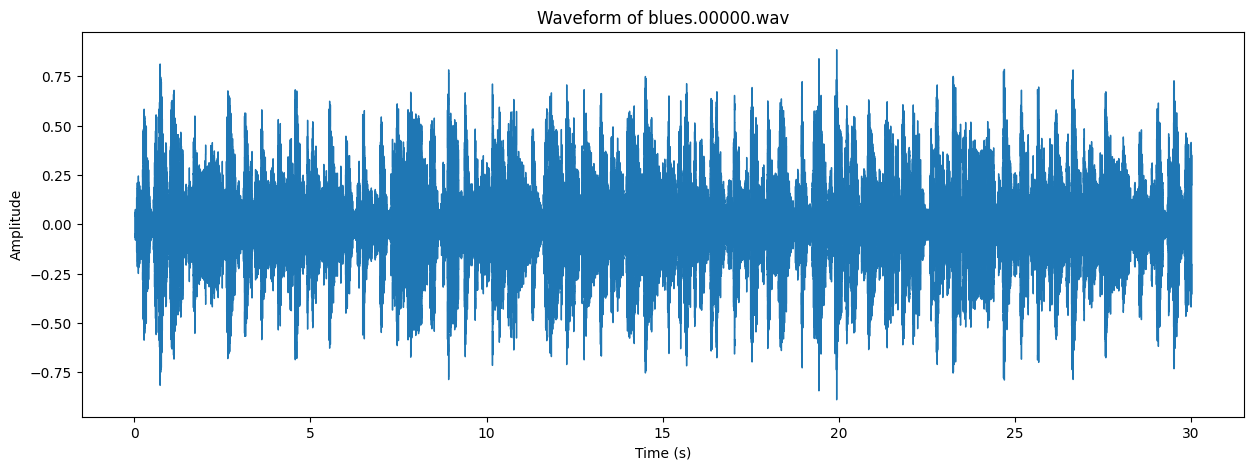

[ 0.00734921  0.01335782  0.01657648 ... -0.07293833 -0.06308185
 -0.03151622]
Sample Rate: 44100


In [19]:
y,sr = librosa.load(random_file_name, sr=44100, mono=True)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of ' + random_file_name)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print(y)
print("Sample Rate:", sr)   

Playing Sound

In [20]:
#playing  sound
import IPython.display as ipd
ipd.Audio(random_file_name, rate=2)  # Play the audio file at the


Doing Visualizations on chunks of audio data

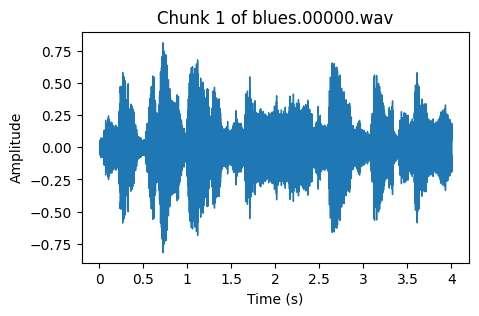

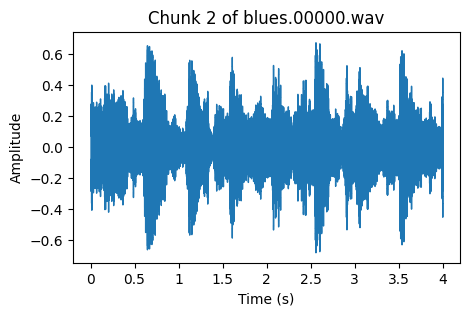

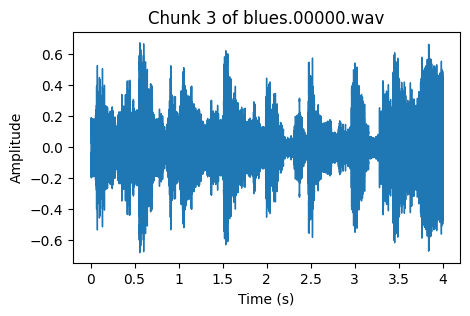

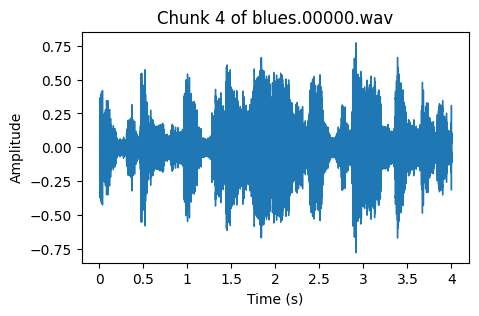

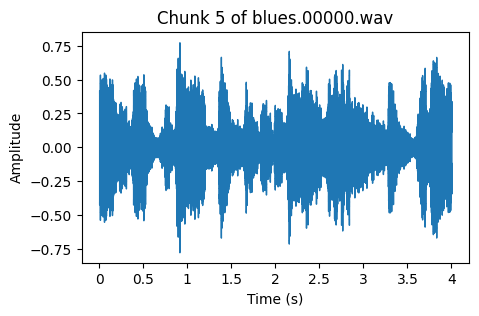

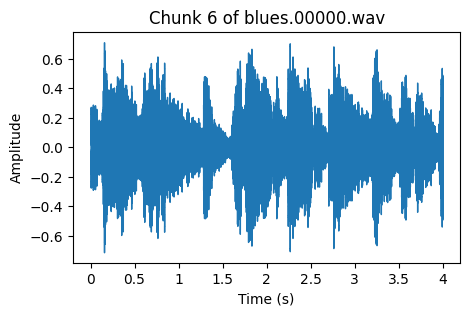

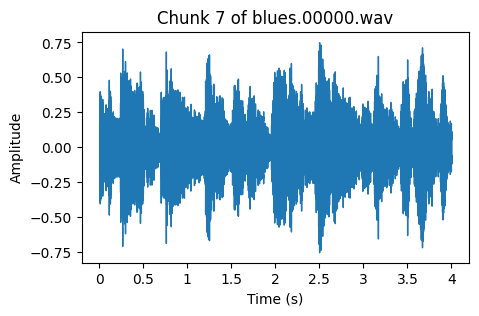

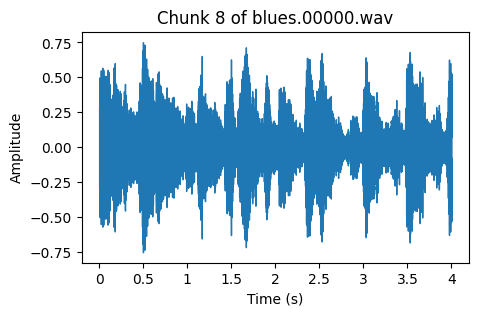

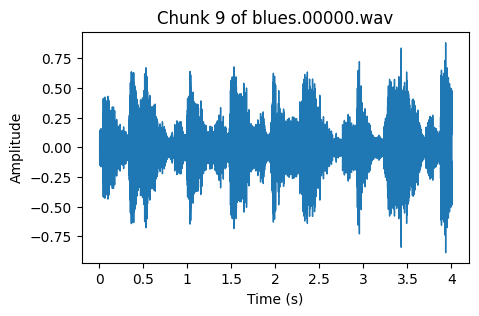

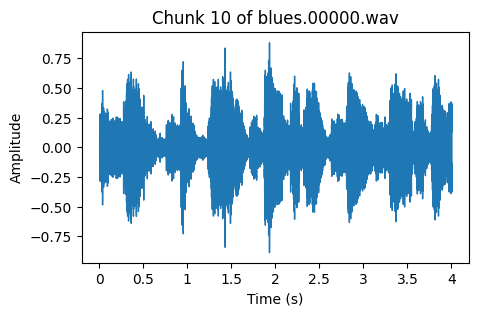

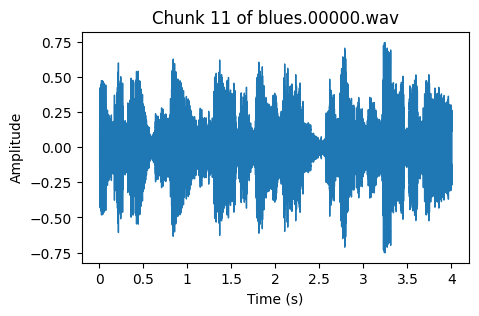

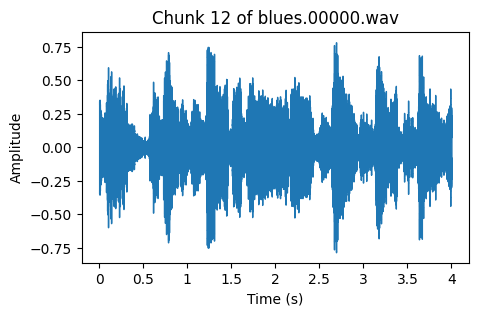

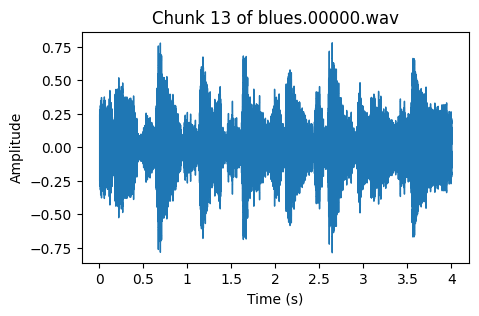

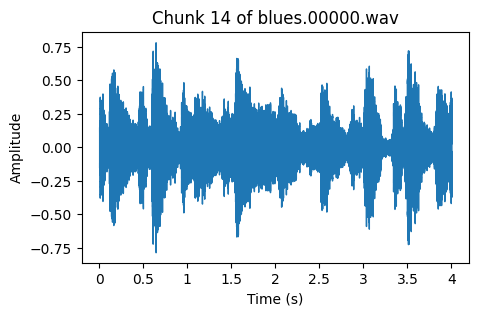

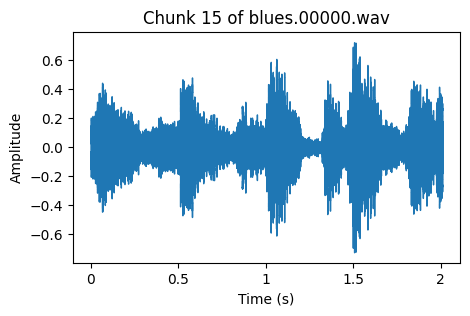

In [23]:
audio_path = "blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)

chunk_duration = 4 
overlap_duration = 2  
# seconds


chunk_samples = int(chunk_duration * sr)
overlap_samples = int(overlap_duration * sr)

num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

chunks = []
for i in range(num_chunks):
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    chunk = y[start:end]
    chunks.append(chunk)
    plt.figure(figsize=(5, 3))
    librosa.display.waveshow(chunk, sr=sr)
    
    plt.title(f'Chunk {i + 1} of {audio_path}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


Melspectrogram Visualization


In [39]:
#plot melspectrogram for entire audio

def plot_melspectrogram(y, sr, title='Melspectrogram'):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    print(S_dB.shape)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

Here are some of the most important Librosa functions that are essential for anyone working with audio data.

### Audio Loading

* `librosa.load()` 🎧
    This is the starting point for almost every project. It loads an audio file into a NumPy array (the raw audio signal) and gives you its **sampling rate**. It can also automatically resample the audio to a new rate on the fly.

***

### Feature Extraction

These functions convert raw audio into meaningful representations, often for machine learning models.

* `librosa.stft()`
    Calculates the **Short-Time Fourier Transform (STFT)**, which breaks down the audio into a **spectrogram**. This shows the intensity of different frequencies over time and is the foundation for many other features.

* `libros.feature.melspectrogram()` 🎵
    Computes a **Mel spectrogram**, which is like a standard spectrogram but uses the Mel scale for frequency. This scale is based on human hearing, making it one of the most popular features for audio deep learning (e.g., speech recognition, music tagging).

* `librosa.feature.mfcc()`
    Calculates **Mel-Frequency Cepstral Coefficients (MFCCs)**. For decades, MFCCs have been a cornerstone feature for speech recognition and music analysis. They provide a compact representation of the spectral shape of the sound.

* `librosa.feature.chroma_stft()`
    Creates a **chromagram**, which represents the harmonic content of the audio. It projects all the energy into 12 bins corresponding to the notes of the musical scale (C, C#, D, etc.). This is extremely useful for tasks involving harmony, like chord recognition.

* `librosa.beat.beat_track()` 🥁
    A high-level function that automatically detects the **tempo** (in beats per minute) and locates the positions of the **beats** in an audio file.

***

### Visualization

* `librosa.display.specshow()` 📊
    The primary tool for visualizing audio features. It can intelligently display any time-frequency representation, like a spectrogram, chromagram, or MFCC matrix, with correctly labeled axes.

***

### Utility Functions

* `librosa.power_to_db()`
    Converts a power spectrogram into the **decibel (dB) scale**. Since decibels are logarithmic, this makes the visualization much more intuitive and closer to how humans perceive loudness. It's almost always used right after creating a spectrogram and before plotting it.

(128, 1293)


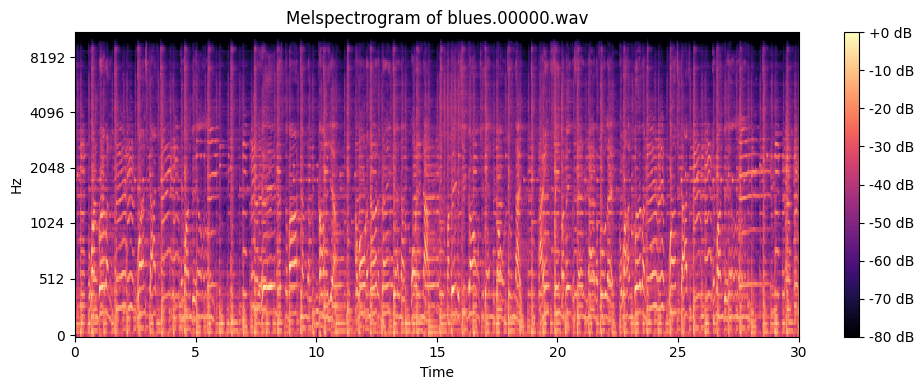

In [40]:
random_file_name = "blues.00000.wav"
y, sr = librosa.load(random_file_name, sr=None)
plot_melspectrogram(y, sr, title='Melspectrogram of ' + random_file_name)

In [31]:
print(len(chunks))

15


(128, 173)


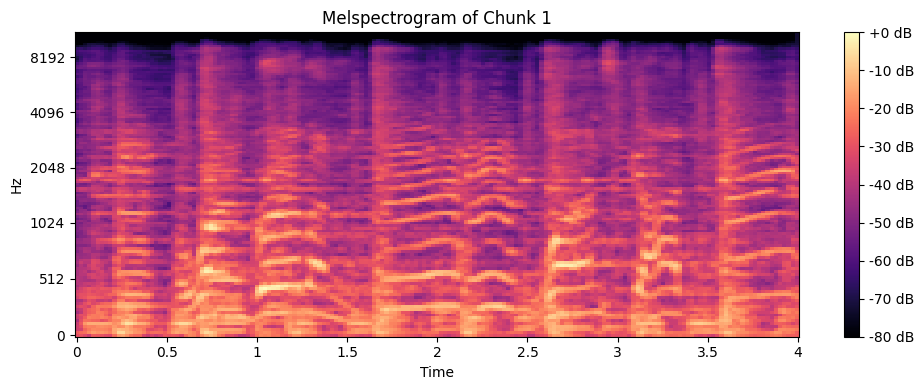

(128, 173)


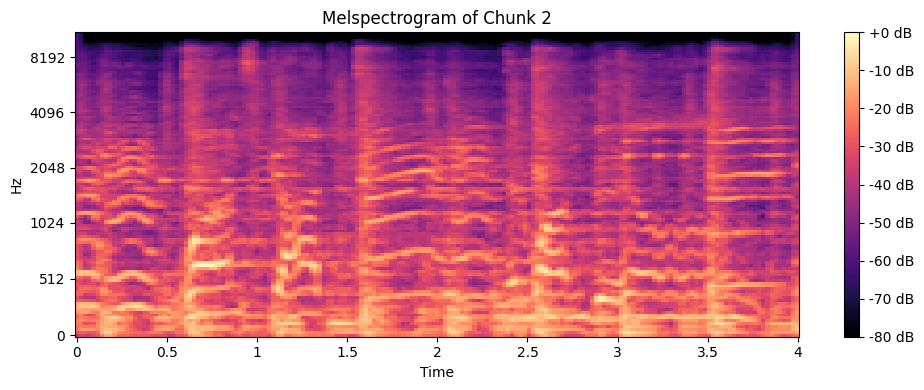

(128, 173)


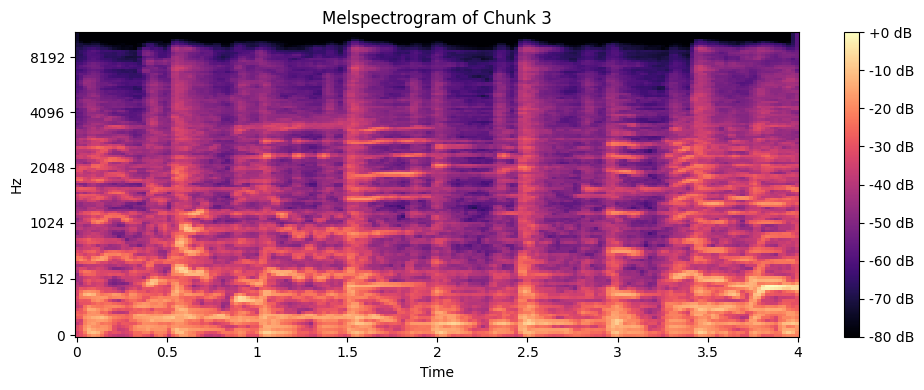

(128, 173)


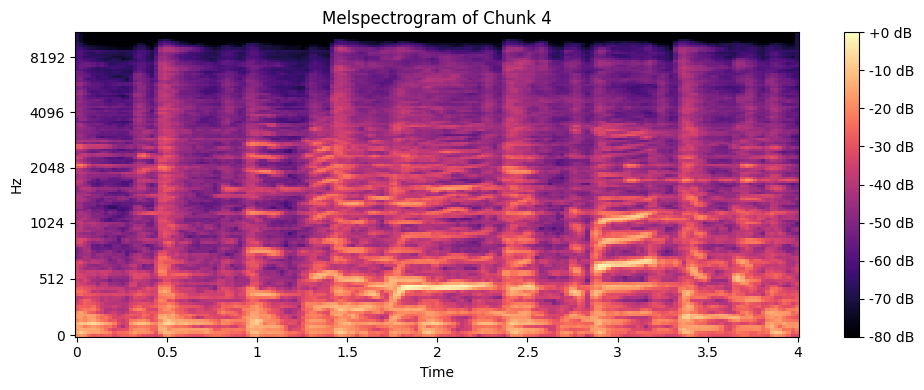

(128, 173)


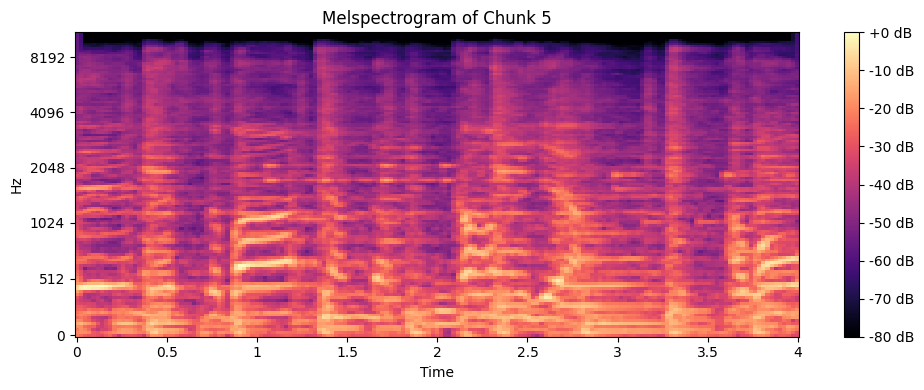

(128, 173)


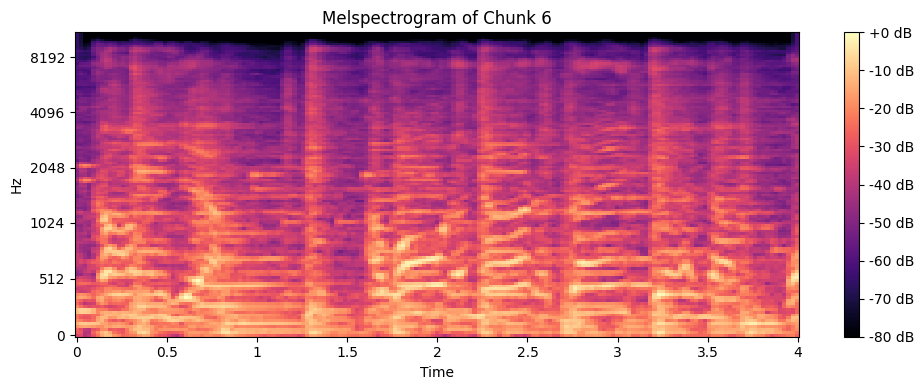

(128, 173)


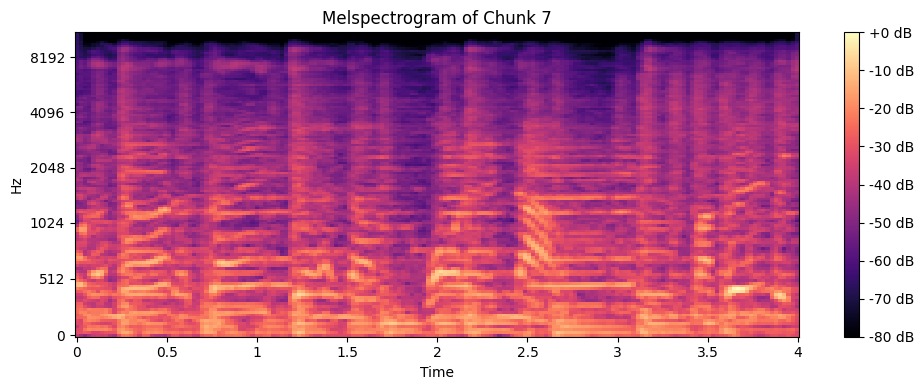

(128, 173)


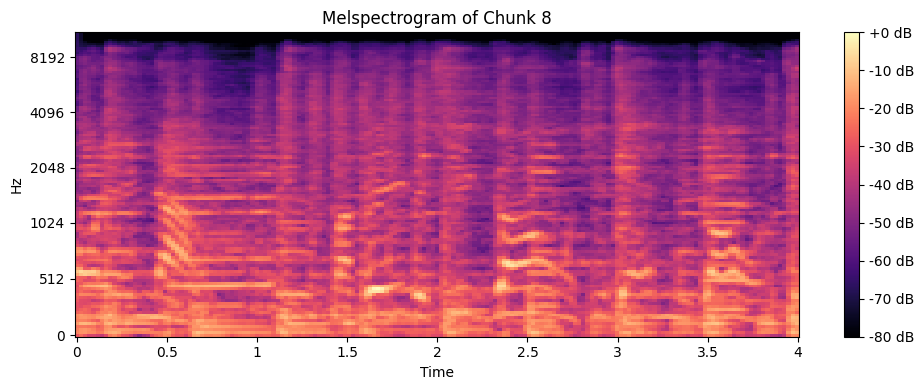

(128, 173)


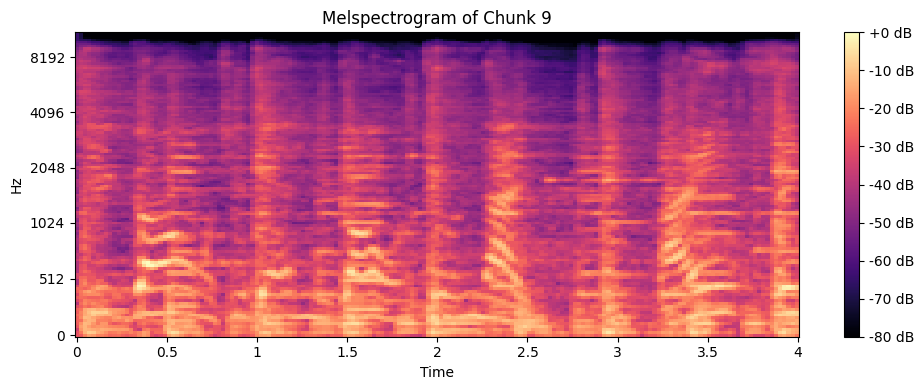

(128, 173)


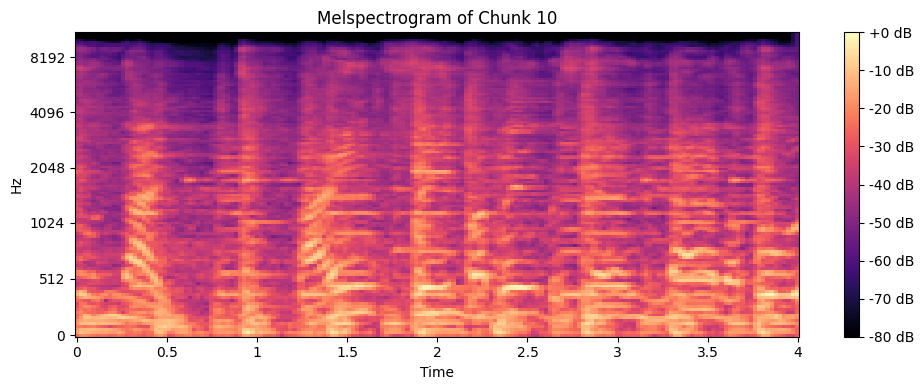

(128, 173)


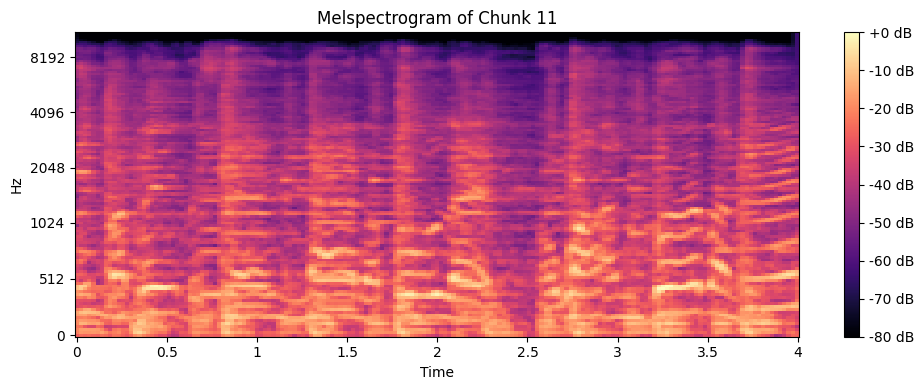

(128, 173)


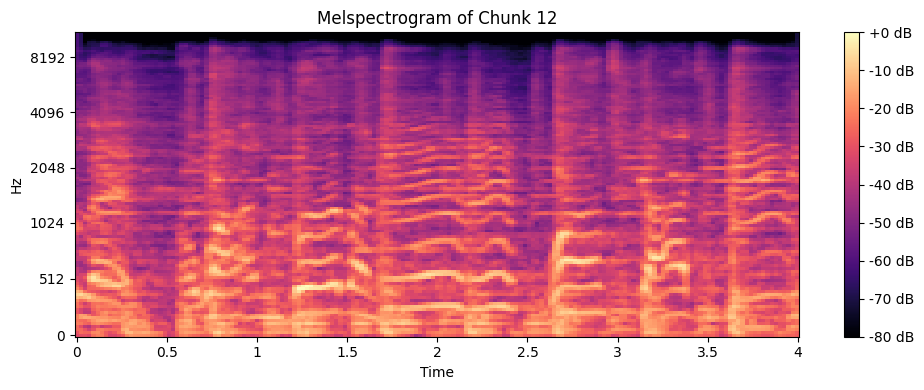

(128, 173)


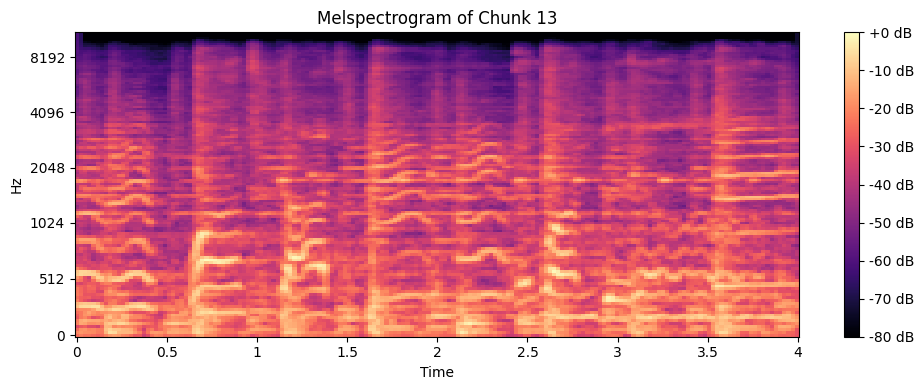

(128, 173)


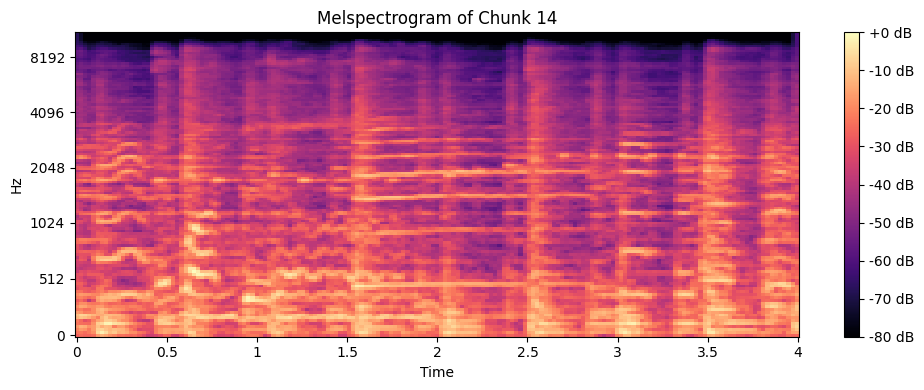

(128, 87)


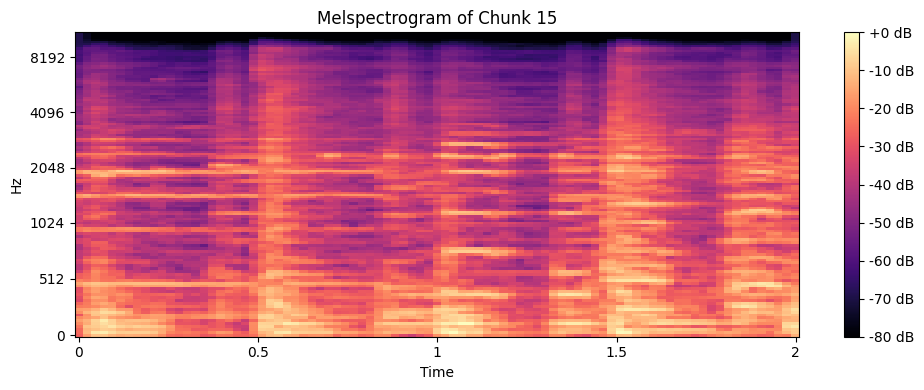

In [41]:
# y, sr = librosa.load(random_file_name, sr=None)
# print(sr)
for i in range(len(chunks)):
    plot_melspectrogram(chunks[i], sr, title=f'Melspectrogram of Chunk {i + 1}')

DATA PREPROCESSING 


In [34]:
data_dir = "../MusicGenreClassification/data/genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [54]:
import tensorflow as tf
def load_and_preprocess(data_dir, classes , target_shape = (148,149)):
    data = []
    labels = []
    skipped_files = []
    
    for label, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_dir, file_name)
                try:
                    y, sr = librosa.load(file_path, sr=None)
                    chunk_duration = 4  # seconds
                    chunk_samples = int(chunk_duration * sr)
                    overlap_duration = 2  # seconds
                    overlap_samples = int(overlap_duration * sr)   
                    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                    for i in range(num_chunks):
                        start = i * (chunk_samples - overlap_samples)
                        end = start + chunk_samples
                        chunk = y[start:end]
                    
                        melspectr = librosa.feature.melspectrogram(y=chunk, sr=sr)
                        mel_spectrogram = tf.image.resize(np.expand_dims(melspectr, axis=-1), target_shape)
                        data.append(mel_spectrogram)
                        labels.append(label)
                        
                except Exception as e:
                    print(f"⚠️  Skipping corrupted file: {file_path} - Error: {str(e)}")
                    skipped_files.append(file_path)
                    continue
    
    print(f"✅ Processed {len(data)} audio chunks from {len(classes)} genres")
    if skipped_files:
        print(f"⚠️  Skipped {len(skipped_files)} corrupted files:")
        for file in skipped_files:
            print(f"   - {file}")
    
    return np.array(data), np.array(labels)

In [55]:
data, labels = load_and_preprocess(data_dir, classes)

/var/folders/l9/bbtkt82929x0lvqhg3x7lyzr0000gn/T/ipykernel_56188/3144201144.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)


⚠️  Skipping corrupted file: ../MusicGenreClassification/data/genres_original/jazz/jazz.00054.wav - Error: 
✅ Processed 14975 audio chunks from 10 genres
⚠️  Skipped 1 corrupted files:
   - ../MusicGenreClassification/data/genres_original/jazz/jazz.00054.wav
✅ Processed 14975 audio chunks from 10 genres
⚠️  Skipped 1 corrupted files:
   - ../MusicGenreClassification/data/genres_original/jazz/jazz.00054.wav


In [42]:
128 * 173

22144

In [43]:
150 * 150

22500

In [45]:
148 * 149

22052

In [56]:
data.shape

(14975, 148, 149, 1)

In [57]:
labels.shape

(14975,)

In [58]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Splitting of Dataset into Training and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (11980, 148, 149, 1), Training labels shape: (11980, 10)
Testing data shape: (2995, 148, 149, 1), Testing labels shape: (2995, 10)


Building Model

In [60]:
model = tf.keras.models.Sequential()



In [61]:
X_train[0].shape

(148, 149, 1)

In [62]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/Users/brijeshkumar03/Downloads/AlgorithmsMachineLearning/projects_mine/MusicGenreClassification/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [64]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [65]:
model.add(Dropout(0.3))

In [66]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [67]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [68]:
model.add(Dropout(0.3))

In [69]:
model.add(Flatten())

In [70]:
model.add(Dense(units=1200,activation='relu'))

In [71]:
model.add(Dropout(0.45))

In [72]:
model.add(Dense(units=len(classes),activation='softmax'))

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 149, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 147, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 35, 35, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 33, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
#Training Model
training_history = model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 252s 669ms/step - accuracy: 0.2011 - loss: 2.1317 - val_accuracy: 0.4301 - val_loss: 1.5653
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 292s 779ms/step - accuracy: 0.4781 - loss: 1.4731 - val_accuracy: 0.5913 - val_loss: 1.1555
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 309s 823ms/step - accuracy: 0.5982 - loss: 1.1524 - val_accuracy: 0.6654 - val_loss: 0.9724
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 315s 841ms/step - accuracy: 0.6605 - loss: 0.9902 - val_accuracy: 0.6871 - val_loss: 0.8706
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 334s 890ms/step - accuracy: 0.7307 - loss: 0.8103 - val_accuracy: 0.7329 - val_loss: 0.7706
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 329s 876ms/step - accuracy: 0.7522 - loss: 0.7344 - val_accuracy: 0.7689 - val_loss: 0.6735
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 859ms/step - accuracy: 0.7995 - loss: 0.5951 - val_accuracy: 0.8013 - val_loss: 0.5993
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 327s 872ms/step - accuracy: 0.8234 -

In [78]:
model.save("Trained_model.keras")

In [79]:
training_history.history

{'accuracy': [0.2747078537940979,
  0.5114357471466064,
  0.6172788143157959,
  0.6716193556785583,
  0.726961612701416,
  0.7620200514793396,
  0.7982470989227295,
  0.8253756165504456,
  0.8507512807846069,
  0.8651919960975647,
  0.8863939642906189,
  0.8967445492744446,
  0.9177796244621277,
  0.9219532608985901,
  0.9342237114906311,
  0.9469950199127197,
  0.9445742964744568,
  0.9566777944564819,
  0.9608514308929443,
  0.960016667842865,
  0.963939905166626,
  0.9692821502685547,
  0.9710350632667542,
  0.9713689684867859,
  0.9741235375404358,
  0.9711185097694397,
  0.9794657826423645,
  0.9784641265869141,
  0.9804674386978149,
  0.9837228655815125],
 'loss': [1.957112431526184,
  1.3818961381912231,
  1.1083256006240845,
  0.9559522867202759,
  0.8104074001312256,
  0.7067562937736511,
  0.5984938144683838,
  0.5242096185684204,
  0.44527050852775574,
  0.4113934338092804,
  0.3446797728538513,
  0.3070371747016907,
  0.2509554624557495,
  0.22792406380176544,
  0.198717698

In [80]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [81]:
X_train

array([[[[3.33743654e-02],
         [9.06803384e-02],
         [1.61206290e-01],
         ...,
         [5.79217263e-02],
         [2.09147528e-01],
         [1.05067313e+00]],

        [[3.04162353e-01],
         [2.03134537e+00],
         [6.47714424e+00],
         ...,
         [1.80806007e+01],
         [1.96757145e+01],
         [8.07126617e+00]],

        [[2.11155415e+00],
         [6.79431438e+00],
         [7.32066679e+00],
         ...,
         [1.93842659e+01],
         [2.17594395e+01],
         [8.63450241e+00]],

        ...,

        [[5.97499125e-02],
         [1.51591212e-01],
         [8.56157318e-02],
         ...,
         [1.19574321e-02],
         [5.00612054e-03],
         [4.49913042e-03]],

        [[3.33192647e-02],
         [6.90883696e-02],
         [4.08576839e-02],
         ...,
         [4.97501343e-03],
         [4.07450786e-03],
         [4.41248994e-03]],

        [[3.26370820e-02],
         [5.45934997e-02],
         [3.36935744e-02],
         ...,
 

In [82]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 149, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 147, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 35, 35, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 33, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,547,376 (82.20 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,364,918 (54.80 MB)

In [83]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [84]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Model Evaluation 1 

In [86]:
train_loss,train_accuracy = model.evaluate(X_train,y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 170ms/step - accuracy: 0.9942 - loss: 0.0210


In [87]:
train_loss,train_accuracy

(0.020505104213953018, 0.9944908022880554)

In [89]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.9239 - loss: 0.2934


In [90]:
val_loss,val_accuracy

(0.31911492347717285, 0.9212020039558411)

In [91]:
training_history_data['val_loss']

[1.5652590990066528,
 1.155548095703125,
 0.9723508358001709,
 0.8706307411193848,
 0.770555853843689,
 0.6735343337059021,
 0.5992748141288757,
 0.5159439444541931,
 0.5751582384109497,
 0.4801432490348816,
 0.40809881687164307,
 0.4714142978191376,
 0.49160873889923096,
 0.5067799687385559,
 0.3837655484676361,
 0.3651334047317505,
 0.37304022908210754,
 0.47629696130752563,
 0.34551751613616943,
 0.4030745327472687,
 0.35983848571777344,
 0.4620485305786133,
 0.36874938011169434,
 0.3074929714202881,
 0.31936556100845337,
 0.3659678101539612,
 0.3828870356082916,
 0.3083474040031433,
 0.31077325344085693,
 0.31911492347717285]

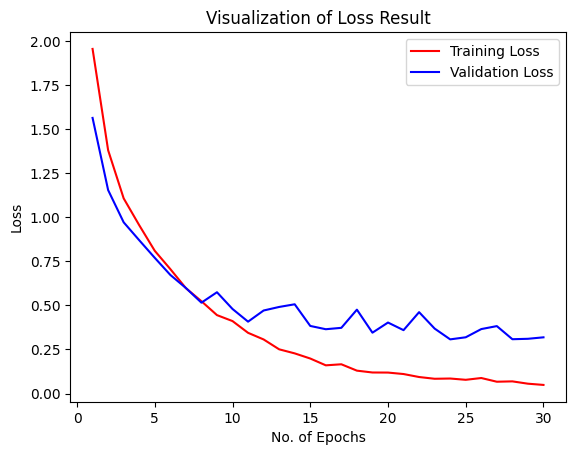

In [92]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

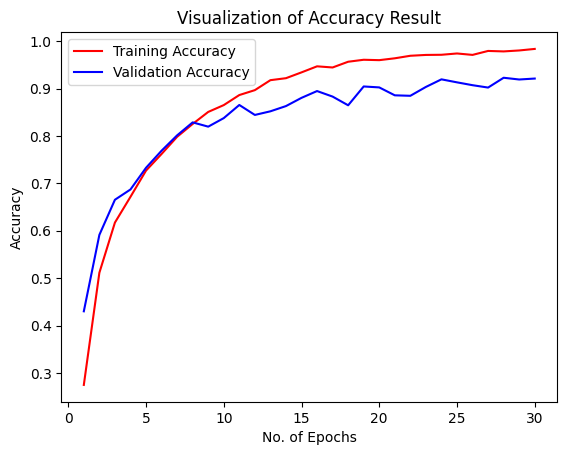

In [93]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Precision,Recall,Confusion Matrix - Model Evaluation-II

In [94]:
X_test.shape

(2995, 148, 149, 1)

In [95]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step


array([[1.0000000e+00, 3.4682426e-16, 1.2315640e-10, ..., 3.3354341e-12,
        4.0889190e-09, 6.8720453e-11],
       [8.5295640e-02, 1.8439690e-06, 9.1013885e-01, ..., 8.3428994e-04,
        3.5246171e-04, 2.5617790e-05],
       [6.8980039e-12, 1.6656068e-14, 1.7769312e-12, ..., 3.7008763e-10,
        2.7364805e-10, 1.3596059e-09],
       ...,
       [1.0817643e-03, 2.4675683e-06, 4.4190965e-05, ..., 4.5883085e-06,
        1.4657732e-04, 5.9508729e-05],
       [1.9119228e-09, 3.6315146e-13, 2.0870579e-10, ..., 4.1664002e-11,
        1.2473603e-12, 2.5329686e-05],
       [2.9772606e-05, 3.1282403e-07, 5.2401808e-04, ..., 2.7316867e-03,
        4.8133978e-04, 3.2569095e-02]], dtype=float32)

In [96]:
y_pred.shape

(2995, 10)

In [97]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([0, 2, 3, ..., 5, 6, 3])

In [99]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
true_categories = np.argmax(y_test,axis=1)
true_categories


array([0, 2, 3, ..., 5, 6, 3])

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.91      0.93      0.92       300
   classical       0.97      0.92      0.94       300
     country       0.88      0.88      0.88       299
       disco       0.91      0.96      0.93       300
      hiphop       0.92      0.94      0.93       300
        jazz       0.89      0.93      0.91       297
       metal       0.93      0.97      0.95       300
         pop       0.96      0.90      0.93       300
      reggae       0.93      0.95      0.94       300
        rock       0.93      0.82      0.87       299

    accuracy                           0.92      2995
   macro avg       0.92      0.92      0.92      2995
weighted avg       0.92      0.92      0.92      2995



In [102]:
#Confusion Matrix Visualization
cm

array([[279,   0,   3,   1,   0,   7,   2,   1,   6,   1],
       [  6, 277,   0,   0,   0,  13,   0,   1,   0,   3],
       [ 10,   1, 262,   2,   2,  10,   2,   0,   4,   6],
       [  1,   1,   1, 289,   1,   0,   1,   2,   1,   3],
       [  1,   0,   1,   2, 283,   1,   2,   5,   4,   1],
       [  4,   7,   2,   0,   2, 277,   0,   1,   3,   1],
       [  0,   0,   5,   1,   1,   0, 291,   0,   0,   2],
       [  2,   0,   8,   7,   8,   0,   1, 271,   1,   2],
       [  2,   0,   2,   8,   3,   1,   0,   0, 284,   0],
       [  3,   1,  13,   9,   7,   3,  14,   2,   1, 246]])

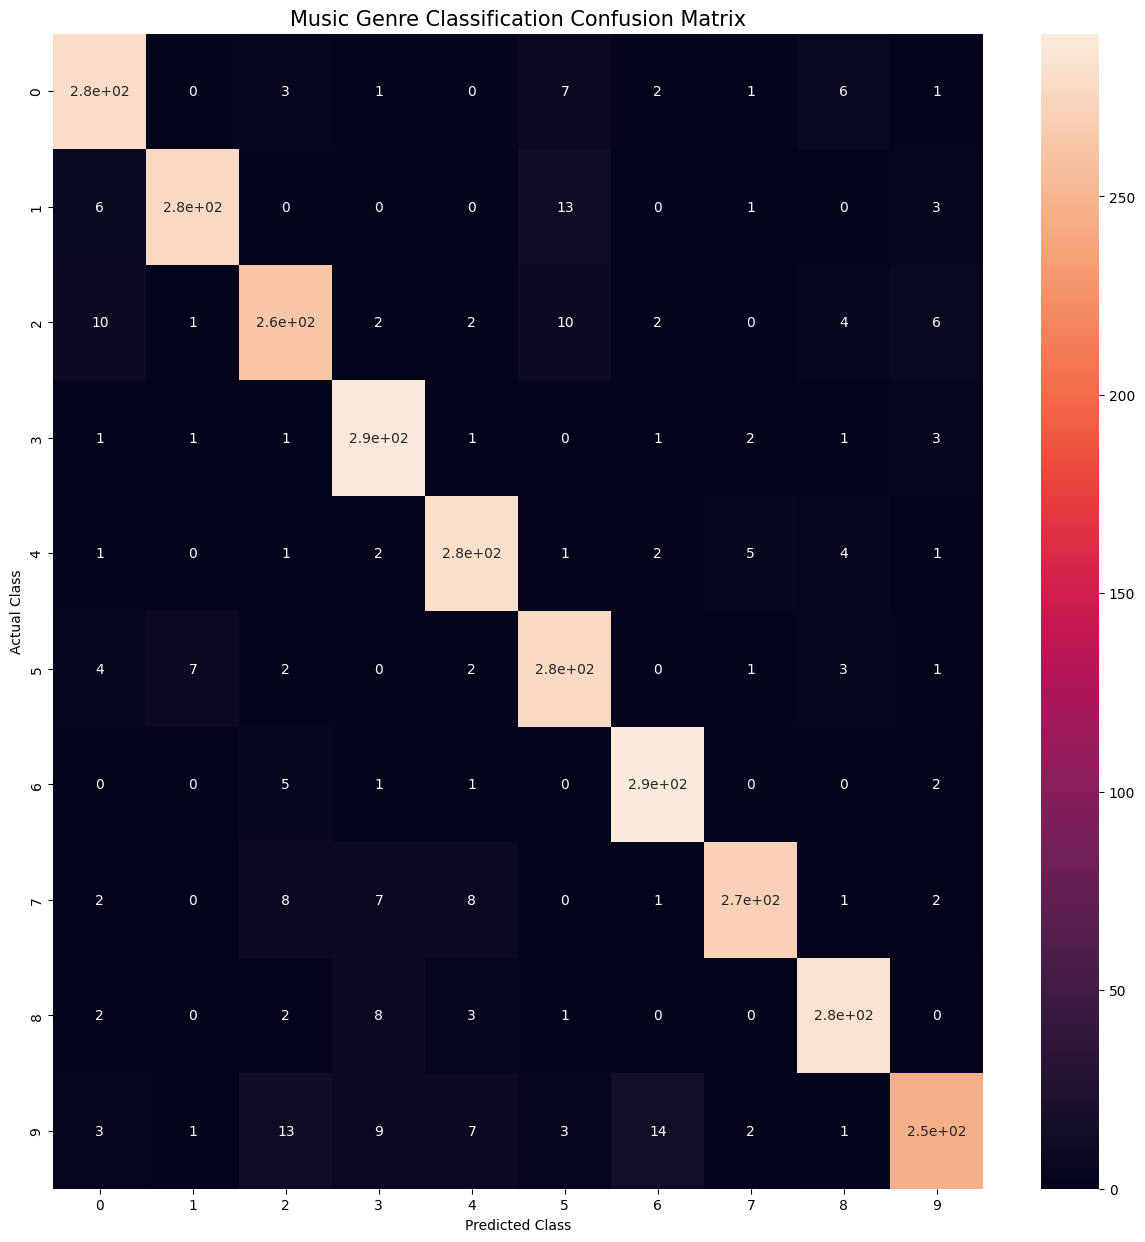

In [103]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()